In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")


In [2]:
def plot_papi_data(data1, data2, name, num_cols=2, interpolation=False, log_scale=True):
       # Inherent to papi data
       if type(data1) == str:
              columns_to_plot = ['Wall clock time', 'PAPI_TOT_CYC', 'PAPI_TOT_INS', 'PAPI_L1_DCM', 'PAPI_L2_DCM']
       else:
              columns_to_plot = data1.columns[1:]
       

       # Plot stuff
       num_rows = int(np.ceil((len(columns_to_plot) - 1) / num_cols))+1
       fig, axis = plt.subplots(num_rows, num_cols, figsize=(9, 12), constrained_layout=True)

       i= 0
       for column in tqdm(columns_to_plot):
              # Plot stuff
              row, col = int(i/num_cols), i%num_cols
              i +=1

              # Load data
              if type(data1) == str:
                     data = pd.read_csv(data1, sep='\t')
              else:
                     data = data1

              # Get atributes
              x_axis = data.columns[0]
              label_name = '#Buckets=10'

              # Get axis
              ax = axis[row, col]

              # Plot
              ax.plot(data[x_axis], data[column], 'o', label=label_name)

              # Interpolate and plot
              if interpolation:
                     #f = interpolate.interp1d(data[x_axis], data[column])
                     #xnew = np.linspace(data[x_axis].min(), data[x_axis].max(), num=100, endpoint=True)
                     #ax.plot(xnew, f(xnew), '--')
                     ax.plot(data[x_axis], data[column], '--b', alpha=0.8)

              # Labels
              ax.set_xlabel(x_axis)
              ax.set_ylabel(column)

              # Scales
              if log_scale:
                     ax.set_xscale('log')
                     ax.set_yscale('log') 

              # Legend
              ax.legend(loc='lower right')

              #####################################
              # Twin the axis
              ax2 = ax.twiny()

              # Load data
              if type(data2) == str:
                     data = pd.read_csv(data2, sep='\t')
              else:
                     data = data2

              # Get atributes
              x_axis = data.columns[0]
              label_name = 'Array Size=100000'

              # Plot
              ax2.plot(data[x_axis], data[column], 'or', label=label_name)

              #  Interpolate and plot
              if interpolation:
                     #f = interpolate.interp1d(data[x_axis], data[column])
                     #xnew = np.linspace(data[x_axis].min(), data[x_axis].max(), num=100, endpoint=True)
                     #ax2.plot(xnew, f(xnew), '--r')

                     ax2.plot(data[x_axis], data[column], '--r', alpha=0.8)

              # Labels
              ax2.set_xlabel(x_axis)
              ax2.set_ylabel(column)

              # Scales
              if log_scale:
                     ax2.set_xscale('log')
                     ax2.set_yscale('log')

              # Legend
              ax2.legend(loc='upper right')

       row, col = int(i/num_cols), i%num_cols
       ax = axis[row, col]
       fig.delaxes(ax)

       # TIGHT!
       plt.tight_layout()

       # Save image & Show
       fig.savefig(join(os.getcwd(), 'graficos', name))
       fig.show()

# Papi base benchmark

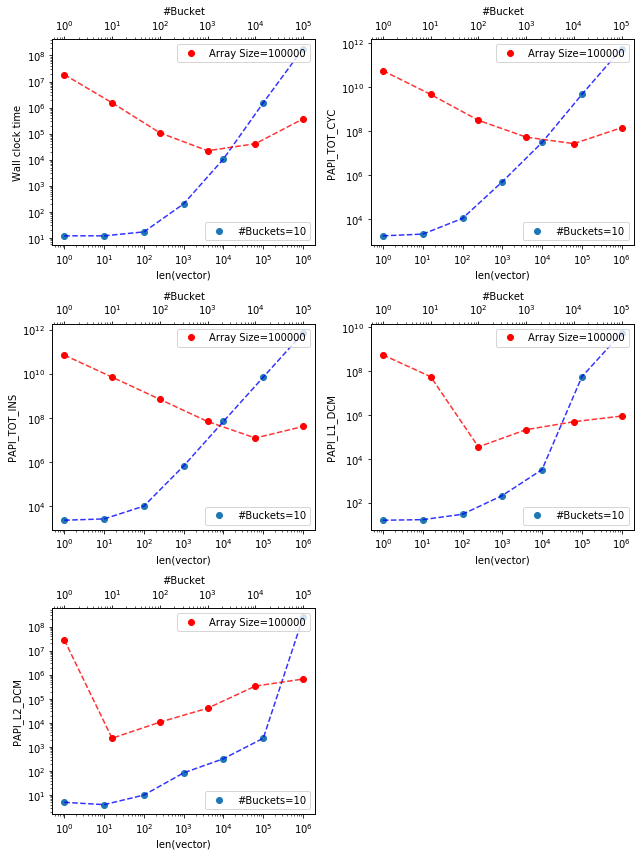

In [3]:
plot_papi_data('data/sequential_PAPI_fixed_num_buckets_10.txt', 
'data/sequential_PAPI_fixed_tam_buckets_100000.txt', 
name='sequential_PAPI.png', interpolation=True)

# Papi with free

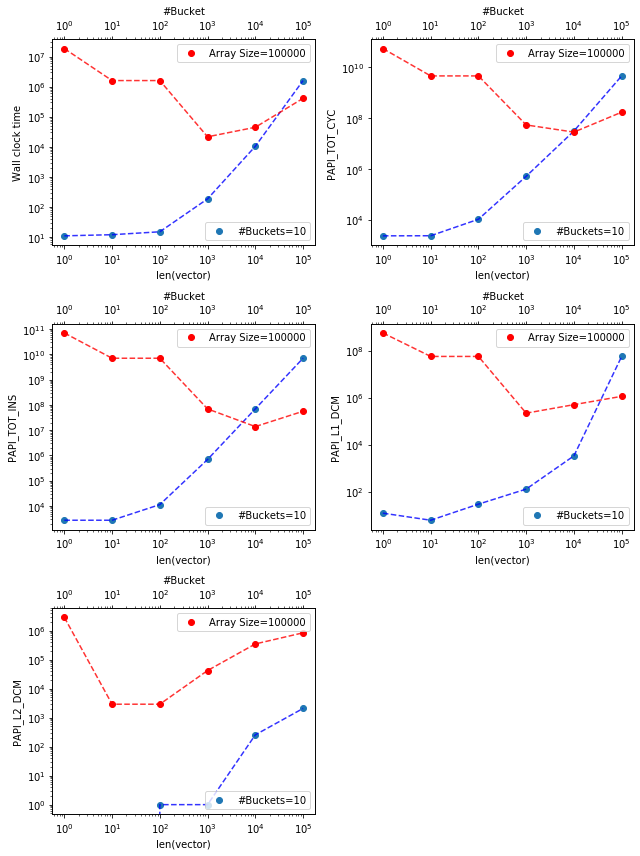

In [4]:
plot_papi_data('data/sequential_PAPI_FREE_fixed_num_buckets_10.txt', 
'data/sequential_PAPI_FREE_fixed_tam_buckets_100000.txt', name='sequential_PAPI_FREE.png',
interpolation=True)

## Papi with free / papi base benchmark

In [5]:

# Data 1 vai ser o base a dividir pelo 
data1 = pd.read_csv('data/sequential_PAPI_fixed_num_buckets_10.txt', sep='\t') / pd.read_csv('data/sequential_PAPI_FREE_fixed_num_buckets_10.txt', sep='\t')

# Colocar o index direito
x_axis = data1.columns[0]
data1[x_axis] = pd.read_csv('data/sequential_PAPI_fixed_num_buckets_10.txt', sep='\t')[x_axis]

data1.columns = [x_axis] + [x+" Ratio" for x in data1.columns if x is not x_axis]



# Data 1 vai ser o base a dividir pelo
data2 = pd.read_csv('data/sequential_PAPI_fixed_tam_buckets_100000.txt', sep='\t') / pd.read_csv('data/sequential_PAPI_FREE_fixed_tam_buckets_100000.txt', sep='\t')

# Colocar o index direito
x_axis = data2.columns[0]
data2[x_axis] = pd.read_csv('data/sequential_PAPI_fixed_tam_buckets_100000.txt', sep='\t')

data2.columns = [x_axis] + [x+" Ratio" for x in data2.columns if x is not x_axis]



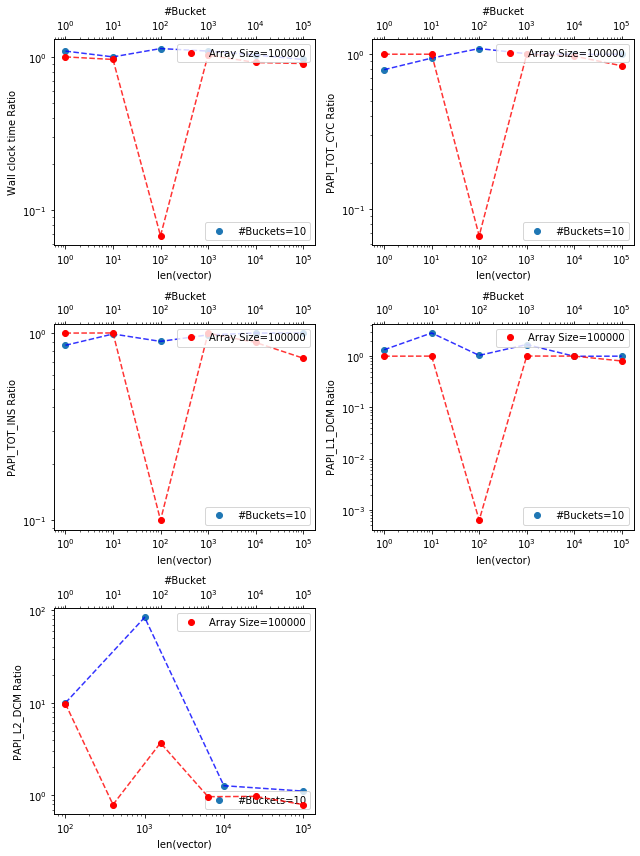

In [6]:
plot_papi_data(data1, data2, name='PAPI_PERFORMANCE_BASE_FREE.png',
interpolation=True, log_scale=True)

# Papi with quick sort

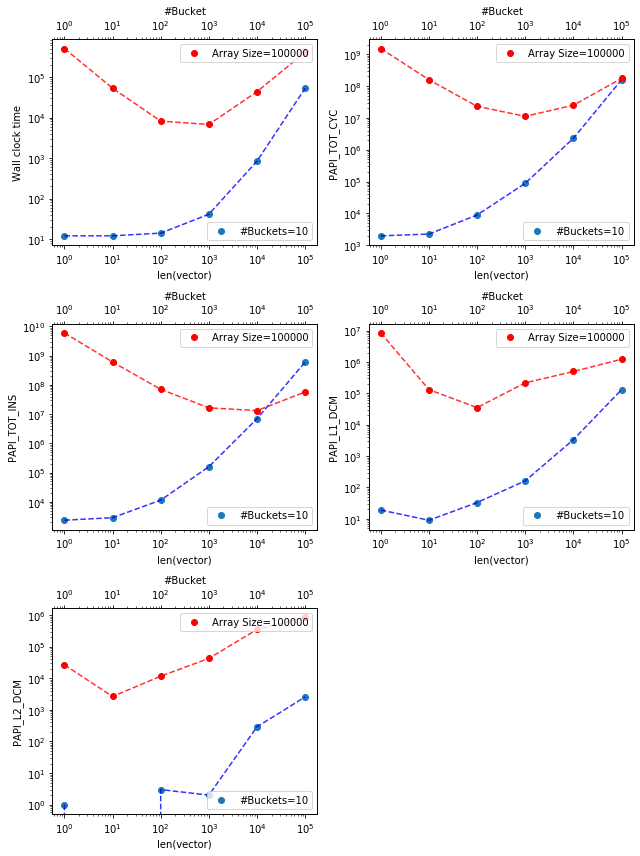

In [10]:
plot_papi_data('data/sequential_PAPI_QUICKSORT_fixed_num_buckets_10.txt', 
'data/sequential_PAPI_QUICKSORT_fixed_tam_buckets_100000.txt', name='sequential_PAPI_QUICKSORT.png',
interpolation=True, log_scale=True)

## Papi with quick sort / papi base benchmark

In [11]:

# Data 1 vai ser o base a dividir pelo quicksort
data1 = pd.read_csv('data/sequential_PAPI_fixed_num_buckets_10.txt', sep='\t') / pd.read_csv('data/sequential_PAPI_QUICKSORT_fixed_num_buckets_10.txt', sep='\t')

# Colocar o index direito
x_axis = data1.columns[0]
data1[x_axis] = pd.read_csv('data/sequential_PAPI_fixed_num_buckets_10.txt', sep='\t')

data1.columns = [x_axis] + [x+" Ratio" for x in data1.columns if x is not x_axis]


In [12]:

# Data 1 vai ser o base a dividir pelo quicksort
data2 = pd.read_csv('data/sequential_PAPI_fixed_tam_buckets_100000.txt', sep='\t') / pd.read_csv('data/sequential_PAPI_QUICKSORT_fixed_tam_buckets_100000.txt', sep='\t')

# Colocar o index direito
x_axis = data2.columns[0]
data2[x_axis] = pd.read_csv('data/sequential_PAPI_fixed_tam_buckets_100000.txt', sep='\t')

data2.columns = [x_axis] + [x+" Ratio" for x in data2.columns if x is not x_axis]


In [13]:
data1

,len(vector),Wall clock time Ratio,PAPI_TOT_CYC Ratio,PAPI_TOT_INS Ratio,PAPI_L1_DCM Ratio,PAPI_L2_DCM Ratio
0,1.0,1.000000,0.928571,0.991525,0.842105,5.000000
1,10.0,1.000000,0.977578,0.930796,1.888889,inf
2,100.0,1.214286,1.262683,0.886957,0.909091,3.333333
3,1000.0,4.951220,5.838084,4.218750,1.312883,42.000000
4,10000.0,12.738095,13.449782,9.900143,0.979104,1.109589
5,100000.0,28.867925,29.050633,11.459016,428.787879,0.891473
6,1000000.0,NaN,NaN,NaN,NaN,NaN


In [14]:
data2

,#Bucket,Wall clock time Ratio,PAPI_TOT_CYC Ratio,PAPI_TOT_INS Ratio,PAPI_L1_DCM Ratio,PAPI_L2_DCM Ratio
0,1.0,36.507937,36.357616,11.613977,66.313310,1044.943820
1,10.0,28.867925,29.050633,11.459016,428.787879,0.864662
2,100.0,13.251534,13.419913,9.816384,1.008499,0.914530
3,1000.0,3.274074,4.785714,4.169697,1.000000,0.948598
4,10000.0,0.942529,1.088000,0.924812,1.000000,0.954802
5,100000.0,0.900000,0.827586,0.707612,0.739024,0.780774


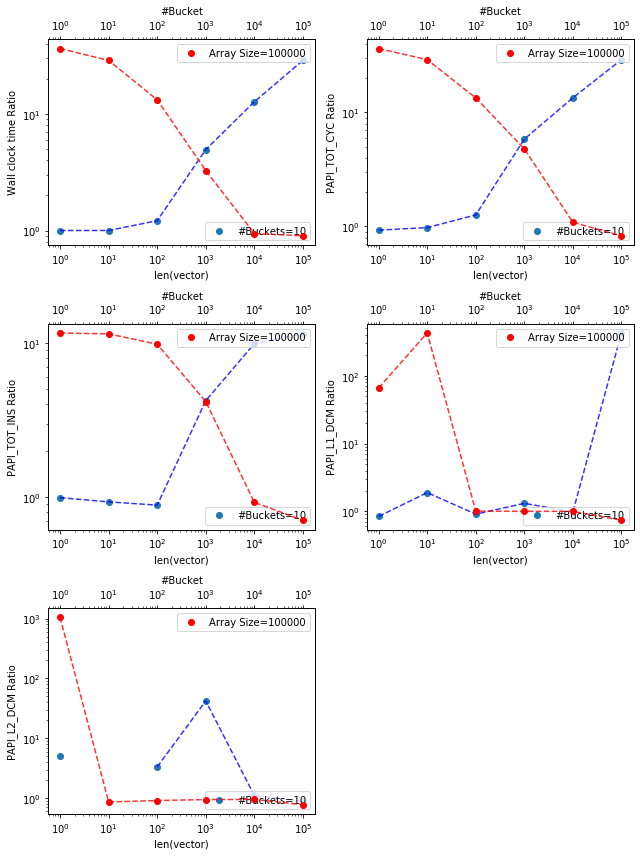

In [15]:
plot_papi_data(data1, data2, name='PAPI_PERFORMANCE_BASE_QUICKSORT.png',
interpolation=True, log_scale=True)